In [1]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import cv2

In [3]:
img = Image.open("augdata/L07/D007_c_0000_origin012.JPG")

In [12]:
Transpose_img = img.transpose(Image.FLIP_TOP_BOTTOM) #vertical flip
Rotate_img = Transpose_img.transpose(Image.ROTATE_180) #rotate 180
T_img = img.transpose(Image.FLIP_LEFT_RIGHT) #horizontal flip
#bright
enhancer_img = ImageEnhance.Brightness(img)
img_1_3= enhancer_img.enhance(1.3) #0.7 1.5


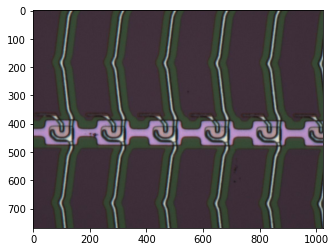

In [13]:
plt.imshow(Transpose_img)

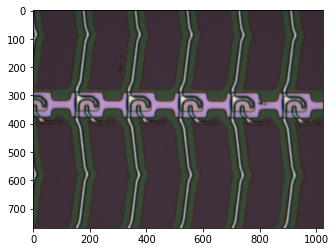

In [14]:
plt.imshow(Rotate_img)

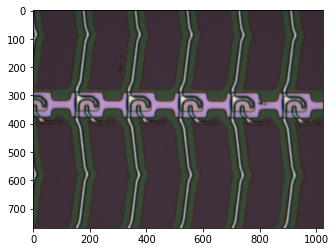

In [15]:
plt.imshow(T_img)

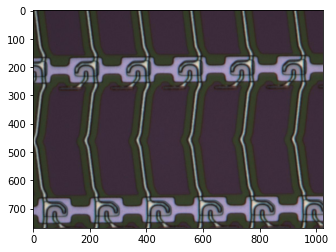

In [16]:
plt.imshow(img)

In [16]:
enhancer = ImageEnhance.Brightness(img)

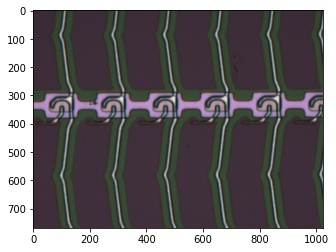

In [17]:
B_img = enhancer.enhance(1)
plt.imshow(B_img)

In [2]:
import csv
import os
import random

In [3]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import cv2

In [4]:
count=0
labels=[]
path=[]
with open ('./val_all_data.csv', newline='') as csvfile:
    csvdata = csv.reader(csvfile)
    for j in csvdata:
        try:
            if j[0]=='image':
                continue
            labels.append(int(j[1]))
            path.append(j[0])
        except:
            print(j)

In [5]:
labels[65256]

22

In [6]:
path[2]

'./A/D001_c_0000116.JPG'

In [5]:
import pandas as pd
df = pd.DataFrame(zip(path,labels),columns=['path','label'])
df

,path,label
0,./A/D001_c_0003707.JPG,0
1,./A/D001_c_0002072.JPG,0
2,./A/D001_c_0000363.JPG,0
3,./A/D001_c_0000590.JPG,0
4,./A/D001_c_0002083.JPG,0
...,...,...
7583,./A/D052_x_0000036.JPG,33
7584,./A/D052_x_0000093.JPG,33
7585,./A/D055_x_0000007.JPG,34
7586,./A/D055_x_0000020.JPG,34


In [ ]:
#0-12 原本的加進去
#13-34 是2000

In [6]:
for i in range(35):
    print(i,df['label'].isin([i]).sum())
#df.loc[:,col_name].value_counts()
#print((df.loc[:,'labels']==0).value_counts())

0 500
1 500
2 500
3 500
4 500
5 500
6 500
7 500
8 500
9 500
10 500
11 500
12 226
13 220
14 40
15 215
16 177
17 65
18 149
19 12
20 44
21 75
22 77
23 52
24 47
25 44
26 30
27 14
28 40
29 20
30 13
31 9
32 6
33 10
34 3


In [85]:
%cd ..

/home/sally/auo


In [29]:
df2=df.loc[df['label'] == 12, ['path']]
df2['path'] = df2['path'].map(lambda x: x.lstrip('.'))

In [30]:
print(df2)
df2.shape

                        path
54000  /A/D017_c_0001975.JPG
54001  /A/D017_c_0001340.JPG
54002  /A/D017_c_0001193.JPG
54003  /A/D017_c_0000981.JPG
54004  /A/D017_c_0000672.JPG
...                      ...
56036  /A/D017_c_0002073.JPG
56037  /A/D017_c_0001794.JPG
56038  /A/D017_c_0000111.JPG
56039  /A/D017_c_0000675.JPG
56040  /A/D017_c_0001724.JPG

[2041 rows x 1 columns]


(2041, 1)

In [31]:
df_path=df2['path'].values.tolist()
df_path

['/A/D017_c_0001975.JPG',
 '/A/D017_c_0001340.JPG',
 '/A/D017_c_0001193.JPG',
 '/A/D017_c_0000981.JPG',
 '/A/D017_c_0000672.JPG',
 '/A/D017_c_0002048.JPG',
 '/A/D017_c_0000430.JPG',
 '/A/D017_c_0001275.JPG',
 '/A/D017_c_0001796.JPG',
 '/A/D017_c_0001227.JPG',
 '/A/D017_c_0000170.JPG',
 '/A/D017_c_0001250.JPG',
 '/A/D017_c_0002006.JPG',
 '/A/D017_c_0001107.JPG',
 '/A/D017_c_0000068.JPG',
 '/A/D017_c_0000499.JPG',
 '/A/D017_c_0000603.JPG',
 '/A/D017_c_0001196.JPG',
 '/A/D017_c_0002092.JPG',
 '/A/D017_c_0001536.JPG',
 '/A/D017_c_0001965.JPG',
 '/A/D017_c_0001376.JPG',
 '/A/D017_c_0000384.JPG',
 '/A/D017_c_0000455.JPG',
 '/A/D017_c_0001790.JPG',
 '/A/D017_c_0000289.JPG',
 '/A/D017_c_0001949.JPG',
 '/A/D017_c_0001410.JPG',
 '/A/D017_c_0001230.JPG',
 '/A/D017_c_0002075.JPG',
 '/A/D017_c_0000485.JPG',
 '/A/D017_c_0000912.JPG',
 '/A/D017_c_0000140.JPG',
 '/A/D017_c_0002005.JPG',
 '/A/D017_c_0000013.JPG',
 '/A/D017_c_0001917.JPG',
 '/A/D017_c_0000406.JPG',
 '/A/D017_c_0000084.JPG',
 '/A/D017_c_

In [32]:
for j in df_path:
    img= Image.open('data/'+j)
    img_name=j[2:14]+j[14:]
    img= img.save("./temp/"+img_name)
print("finish")

finish


In [33]:
data = os.listdir('./temp')
len(data)

56041

In [203]:
#vertical flip
for j in df_path:
    img= Image.open('data/'+j)
    vertiflip_img = img.transpose(Image.FLIP_TOP_BOTTOM) #vertical flip
    img_name = j[2:14] + "_vertic" + j[14:]
    
    vertiflip_img = vertiflip_img.save("./augdata/L23"+img_name)

In [204]:
data = os.listdir('./augdata/L23/')
len(data)

1347

In [205]:
#rotate 180
for j in df_path:
    img= Image.open('data/'+j)
    Rotate_img = img.transpose(Image.ROTATE_180) #rotate 180
    img_name = j[2:14] + "_Rotate" + j[14:]
    
    Rotate_img = Rotate_img.save("./augdata/L23"+img_name)

In [206]:
data = os.listdir('./augdata/L23/')
len(data)

2694

In [110]:
#horizontal flip
for j in df_path:
    img= Image.open('data/'+j)
    horizon_img = img.transpose(Image.FLIP_LEFT_RIGHT) #horizontal flip
    img_name = j[2:14] + "_Horizon" + j[14:]
    
    horizon_img = horizon_img.save("./augdata/L22"+img_name)

In [118]:
data = os.listdir('./augdata/L23/')
len(data)

1797

In [160]:
#bright 1.3
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_1_3= enhancer_img.enhance(1.3) #0.7 1.5
    img_name = j[2:14] + "_bright1.3" + j[14:]
    
    img_1_3 = img_1_3.save("./augdata/L51"+img_name)

In [161]:
data = os.listdir('./augdata/L51/')
len(data)

252

In [162]:
#bright 0.7
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_0_7= enhancer_img.enhance(0.7) #0.7 
    img_name = j[2:14] + "_bright0.7" + j[14:]
    
    img_0_7 = img_0_7.save("./augdata/L51"+img_name)

In [98]:
data = os.listdir('./augdata/L22/')
len(data)

1783

In [164]:
#bright 1.5
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_1_5= enhancer_img.enhance(1.5) #1.5
    img_name = j[2:14] + "_bright1.5" + j[14:]
    
    img_1_5 = img_1_5.save("./augdata/L51"+img_name)

In [165]:
data = os.listdir('./augdata/L51/')
len(data)

378

In [166]:
#bright 1.3+vertical flip
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_1_3= enhancer_img.enhance(1.3) #bright 1.3
    vertiflip_img = img_1_3.transpose(Image.FLIP_TOP_BOTTOM) #vertical flip
    img_name = j[2:14] + "_b1.3_verf" + j[14:]
    
    vertiflip_img = vertiflip_img.save("./augdata/L51"+img_name)

In [167]:
data = os.listdir('./augdata/L51/')
len(data)

441

In [168]:
#bright 1.3+Rotate180
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_1_3= enhancer_img.enhance(1.3) #bright 1.3
    Rotate_img = img_1_3.transpose(Image.ROTATE_180) #rotate 180
    img_name = j[2:14] + "_b1.3_rotate" + j[14:]
    
    Rotate_img= Rotate_img.save("./augdata/L51"+img_name)

In [169]:
data = os.listdir("./augdata/L51/")
len(data)

504

In [170]:
#bright 1.3+horizontal flip
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_1_3= enhancer_img.enhance(1.3) #bright 1.3
    horizon_img = img_1_3.transpose(Image.FLIP_LEFT_RIGHT) #horizontal flip
    img_name = j[2:14] + "_b1.3_hori" + j[14:]
    
    horizon_img= horizon_img.save("./augdata/L51"+img_name)

In [171]:
data = os.listdir("./augdata/L51/")
len(data)

567

In [172]:
#bright 0.7+vertical flip
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_0_7= enhancer_img.enhance(0.7) #bright 0.7
    vertiflip_img = img_0_7.transpose(Image.FLIP_TOP_BOTTOM) #vertical flip
    img_name = j[2:14] + "_b0.7_verf" + j[14:]
    
    vertiflip_img = vertiflip_img.save("./augdata/L51"+img_name)

In [173]:
data = os.listdir("./augdata/L51/")
len(data)

630

In [174]:
#bright 0.7+Rotate180
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_0_7= enhancer_img.enhance(0.7) #bright 0.7
    Rotate_img = img_0_7.transpose(Image.ROTATE_180) #rotate 180
    img_name = j[2:14] + "_b0.7_rotate" + j[14:]
    
    Rotate_img= Rotate_img.save("./augdata/L51"+img_name)

In [175]:
data = os.listdir('./augdata/L51/')
len(data)

693

In [176]:
#bright 0.7+horizontal flip
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_0_7= enhancer_img.enhance(0.7) #bright 0.7
    horizon_img = img_0_7.transpose(Image.FLIP_LEFT_RIGHT) #horizontal flip
    img_name = j[2:14] + "_b0.7_hori" + j[14:]
    
    horizon_img= horizon_img.save("./augdata/L51"+img_name)

In [177]:
data = os.listdir("./augdata/L51/")
len(data)

756

In [178]:
#bright 1.5+vertical flip
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_1_5= enhancer_img.enhance(1.5) #bright 1.5
    vertiflip_img = img_1_5.transpose(Image.FLIP_TOP_BOTTOM) #vertical flip
    img_name = j[2:14] + "_b1.5_verf" + j[14:]
    
    vertiflip_img = vertiflip_img.save("./augdata/L51"+img_name)

In [179]:
data = os.listdir("./augdata/L51/")
len(data)

819

In [180]:
#bright 1.5+Rotate180
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_1_5= enhancer_img.enhance(1.5) #bright 0.7
    Rotate_img = img_1_5.transpose(Image.ROTATE_180) #rotate 180
    img_name = j[2:14] + "_b1.5_rotate" + j[14:]
    
    Rotate_img= Rotate_img.save("./augdata/L51"+img_name)

In [181]:
data = os.listdir('./augdata/L51/')
len(data)

882

In [182]:
#bright 1.5+horizontal flip
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_1_5= enhancer_img.enhance(1.5) #bright 0.7
    horizon_img = img_1_5.transpose(Image.FLIP_LEFT_RIGHT) #horizontal flip
    img_name = j[2:14] + "_b1.5_hori" + j[14:]
    
    horizon_img= horizon_img.save("./augdata/L51"+img_name)

In [183]:
data = os.listdir("./augdata/L51")
len(data)

945

In [184]:
#bright 0.5
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_0_5= enhancer_img.enhance(0.5) #0.7 
    img_name = j[2:14] + "_bright0.5" + j[14:]
    
    img_0_5 = img_0_5.save("./augdata/L51"+img_name)

In [73]:
data = os.listdir("./augdata/L44")
len(data)

2000

In [45]:
#bright 1.7
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_0_5= enhancer_img.enhance(1.7) 
    img_name = j[2:14] + "_bright1.7" + j[14:]
    
    img_0_5 = img_0_5.save("./augdata/L51"+img_name)

In [46]:
data = os.listdir("./augdata/L51")
len(data)

1071

In [47]:
#bright 1.7+vertical flip
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_0_7= enhancer_img.enhance(1.7) 
    vertiflip_img = img_0_7.transpose(Image.FLIP_TOP_BOTTOM) #vertical flip
    img_name = j[2:14] + "_b1.7_verf" + j[14:]
    
    vertiflip_img = vertiflip_img.save("./augdata/L51"+img_name)

In [48]:
data = os.listdir("./augdata/L51")
len(data)

1134

In [49]:
#bright 1.7+Rotate180
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_1_5= enhancer_img.enhance(1.7) #bright 1.7
    Rotate_img = img_1_5.transpose(Image.ROTATE_180) #rotate 180
    img_name = j[2:14] + "_b1.7_rotate" + j[14:]
    
    Rotate_img= Rotate_img.save("./augdata/L51"+img_name)

In [50]:
data = os.listdir("./augdata/L51")
len(data)

1197

In [51]:
#bright 1.7+horizontal flip
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_1_5= enhancer_img.enhance(1.7) #bright 1.7
    horizon_img = img_1_5.transpose(Image.FLIP_LEFT_RIGHT) #horizontal flip
    img_name = j[2:14] + "_b1.7_hori" + j[14:]
    
    horizon_img= horizon_img.save("./augdata/L51"+img_name)

In [52]:
data = os.listdir("./augdata/L51")
len(data)

1260

In [53]:
#bright 1.9
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_0_5= enhancer_img.enhance(1.9) 
    img_name = j[2:14] + "_bright1.9" + j[14:]
    
    img_0_5 = img_0_5.save("./augdata/L51"+img_name)

In [54]:
data = os.listdir("./augdata/L51")
len(data)

1323

In [55]:
#bright 1.9+vertical flip
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_0_7= enhancer_img.enhance(1.9) 
    vertiflip_img = img_0_7.transpose(Image.FLIP_TOP_BOTTOM) #vertical flip
    img_name = j[2:14] + "_b1.9_verf" + j[14:]
    
    vertiflip_img = vertiflip_img.save("./augdata/L51"+img_name)


In [56]:
data = os.listdir("./augdata/L51")
len(data)

1386

In [57]:
#bright 1.9+Rotate180
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_1_5= enhancer_img.enhance(1.9) 
    Rotate_img = img_1_5.transpose(Image.ROTATE_180) #rotate 180
    img_name = j[2:14] + "_b1.9_rotate" + j[14:]
    
    Rotate_img= Rotate_img.save("./augdata/L51"+img_name)

In [58]:
data = os.listdir("./augdata/L51")
len(data)

1449

In [59]:
#bright 1.9+horizontal flip
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_1_5= enhancer_img.enhance(1.9) 
    horizon_img = img_1_5.transpose(Image.FLIP_LEFT_RIGHT) #horizontal flip
    img_name = j[2:14] + "_b1.9_hori" + j[14:]
    
    horizon_img= horizon_img.save("./augdata/L51"+img_name)

In [60]:
data = os.listdir("./augdata/L51")
len(data)

1512

In [61]:
#bright 2.1
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_0_5= enhancer_img.enhance(2.1) 
    img_name = j[2:14] + "_bright2.1" + j[14:]
    
    img_0_5 = img_0_5.save("./augdata/L51"+img_name)

In [62]:
data = os.listdir("./augdata/L51")
len(data)

1575

In [63]:
#bright 2.1+vertical flip
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_0_7= enhancer_img.enhance(2.1) 
    vertiflip_img = img_0_7.transpose(Image.FLIP_TOP_BOTTOM) #vertical flip
    img_name = j[2:14] + "_b2.1_verf" + j[14:]
    
    vertiflip_img = vertiflip_img.save("./augdata/L51"+img_name)

In [64]:
data = os.listdir("./augdata/L51")
len(data)

1638

In [65]:
#bright 2.1+Rotate180
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_1_5= enhancer_img.enhance(2.1) 
    Rotate_img = img_1_5.transpose(Image.ROTATE_180) #rotate 180
    img_name = j[2:14] + "_b2.1_rotate" + j[14:]
    
    Rotate_img= Rotate_img.save("./augdata/L51"+img_name)

In [66]:
data = os.listdir("./augdata/L51")
len(data)

1701

In [67]:
#bright 2.1+horizontal flip
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_1_5= enhancer_img.enhance(2.1) 
    horizon_img = img_1_5.transpose(Image.FLIP_LEFT_RIGHT) #horizontal flip
    img_name = j[2:14] + "_b2.1_hori" + j[14:]
    
    horizon_img= horizon_img.save("./augdata/L51"+img_name)

In [68]:
data = os.listdir("./augdata/L51")
len(data)

1764

In [69]:
#bright 2.3
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_0_5= enhancer_img.enhance(2.3) 
    img_name = j[2:14] + "_bright2.3" + j[14:]
    
    img_0_5 = img_0_5.save("./augdata/L51"+img_name)
data = os.listdir("./augdata/L51")
len(data)

1827

In [70]:
#bright 2.3+vertical flip
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_0_7= enhancer_img.enhance(2.3) 
    vertiflip_img = img_0_7.transpose(Image.FLIP_TOP_BOTTOM) #vertical flip
    img_name = j[2:14] + "_b2.3_verf" + j[14:]
    
    vertiflip_img = vertiflip_img.save("./augdata/L51"+img_name)
data = os.listdir("./augdata/L51")
len(data)

1890

In [71]:
#bright 2.3+Rotate180
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_1_5= enhancer_img.enhance(2.3) 
    Rotate_img = img_1_5.transpose(Image.ROTATE_180) #rotate 180
    img_name = j[2:14] + "_b2.3_rotate" + j[14:]
    
    Rotate_img= Rotate_img.save("./augdata/L51"+img_name)
data = os.listdir("./augdata/L51")
len(data)

1953

In [72]:
#bright 2.3+horizontal flip
for j in df_path:
    img= Image.open('data/'+j)
    #bright
    enhancer_img = ImageEnhance.Brightness(img)
    img_1_5= enhancer_img.enhance(2.3) 
    horizon_img = img_1_5.transpose(Image.FLIP_LEFT_RIGHT) #horizontal flip
    img_name = j[2:14] + "_b2.3_hori" + j[14:]
    
    horizon_img= horizon_img.save("./augdata/L51"+img_name)
data = os.listdir("./augdata/L51")
len(data)

2016